In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data= pd.read_csv("D:\\NTI\\kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [4]:
pd.set_option('display.max_columns', None)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [5]:
#all data is numrical 

In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(21613, 21)

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

In [9]:
data['waterfront'].value_counts() #imbalance but we can drop it

waterfront
0    21450
1      163
Name: count, dtype: int64

In [10]:
data['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [11]:
data['date'] = pd.to_datetime(data['date'], format="%Y%m%dT%H%M%S")
data['date'] = data['date'].dt.strftime("%d-%m-%Y")

In [12]:
data['date']

0        13-10-2014
1        09-12-2014
2        25-02-2015
3        09-12-2014
4        18-02-2015
            ...    
21608    21-05-2014
21609    23-02-2015
21610    23-06-2014
21611    16-01-2015
21612    15-10-2014
Name: date, Length: 21613, dtype: object

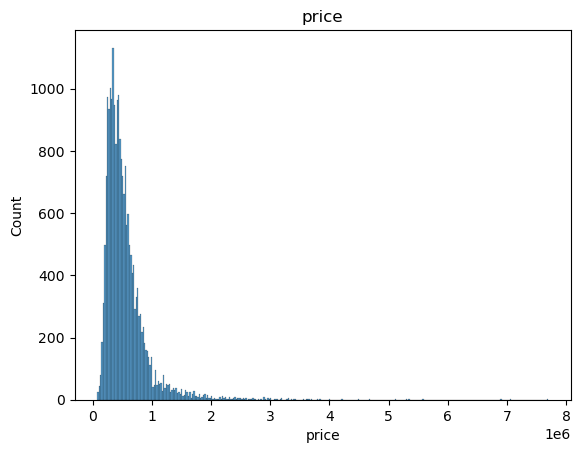

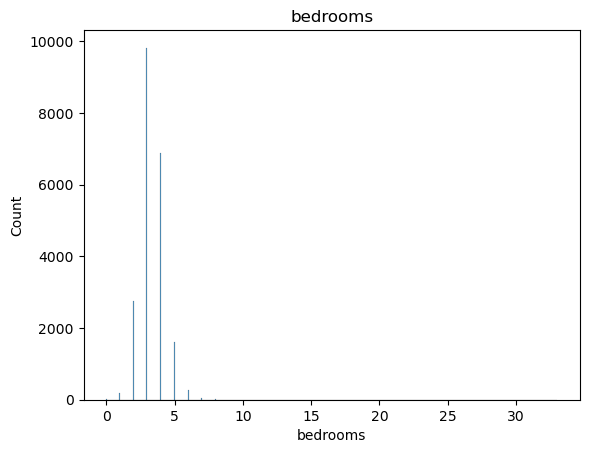

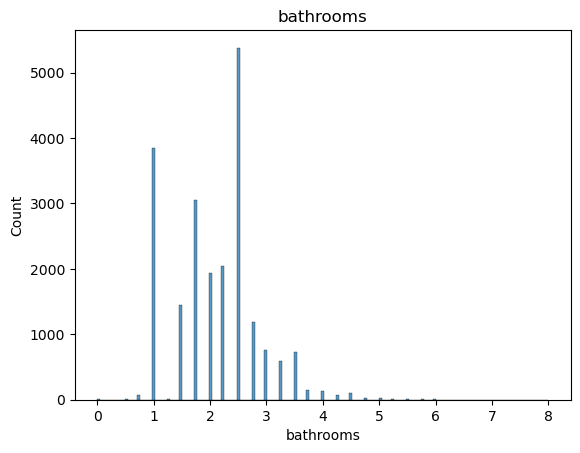

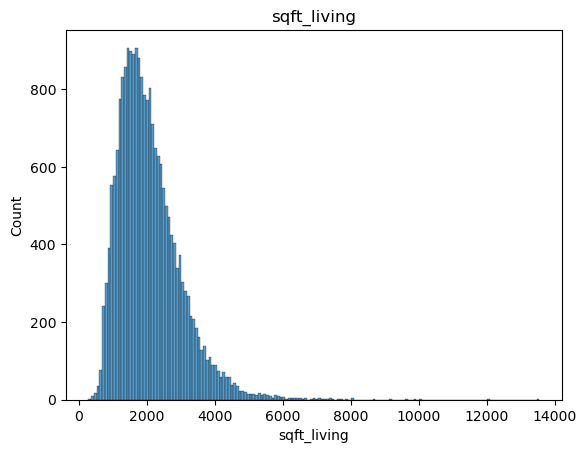

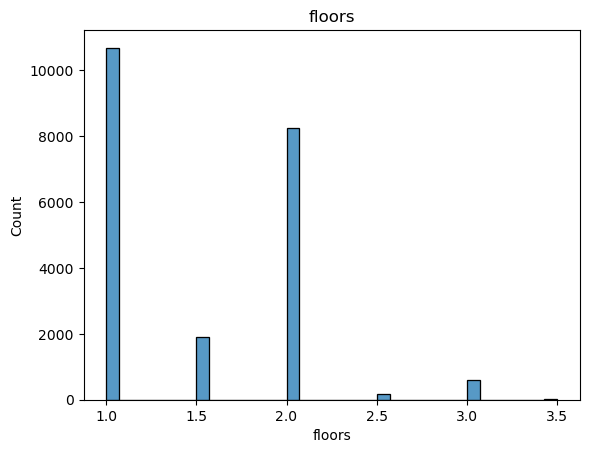

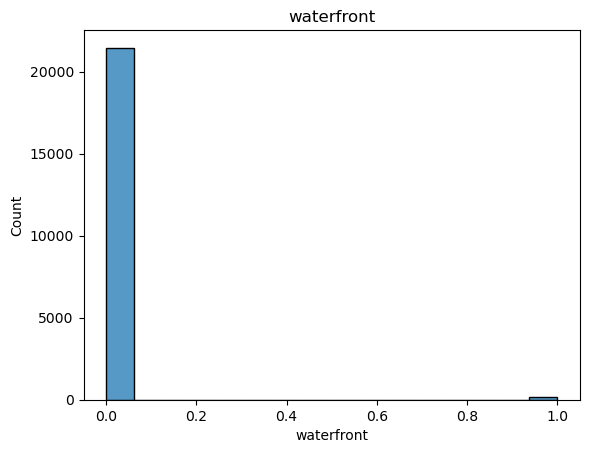

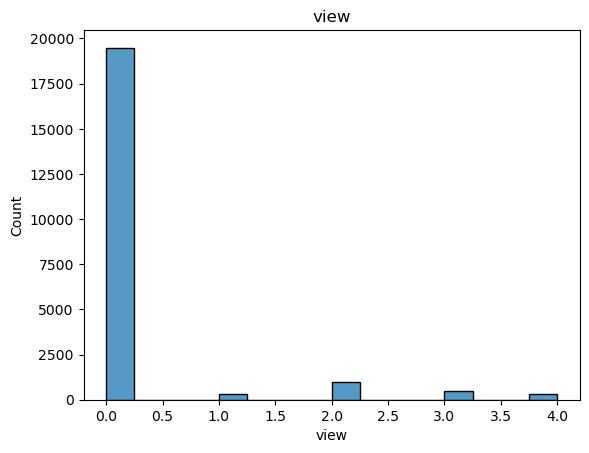

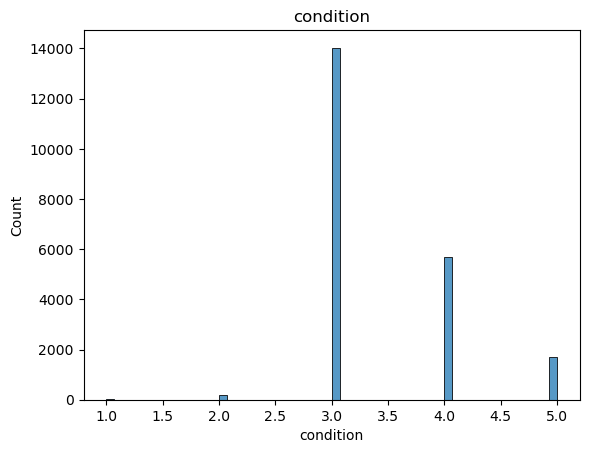

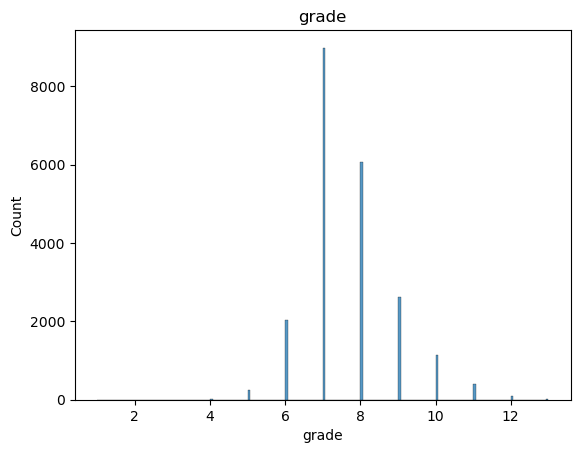

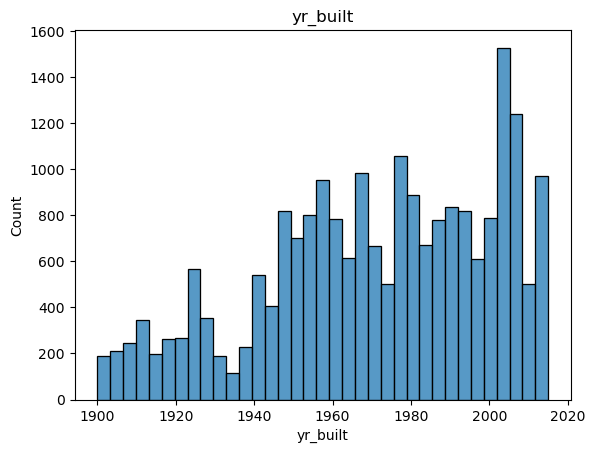

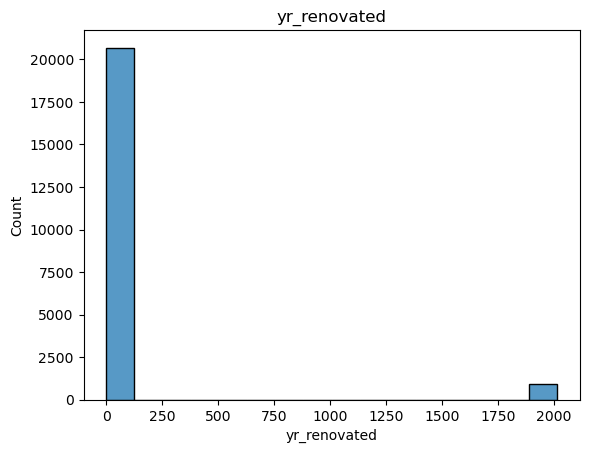

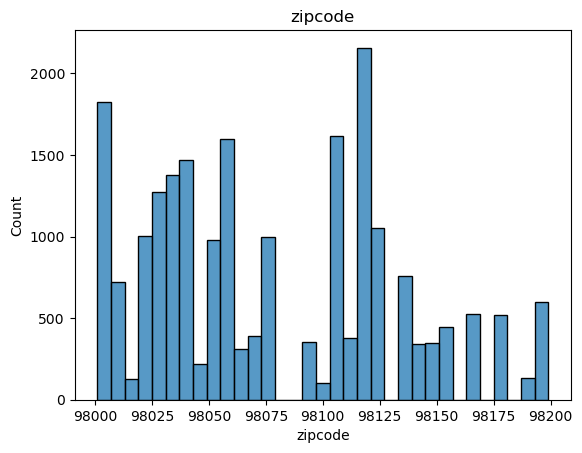

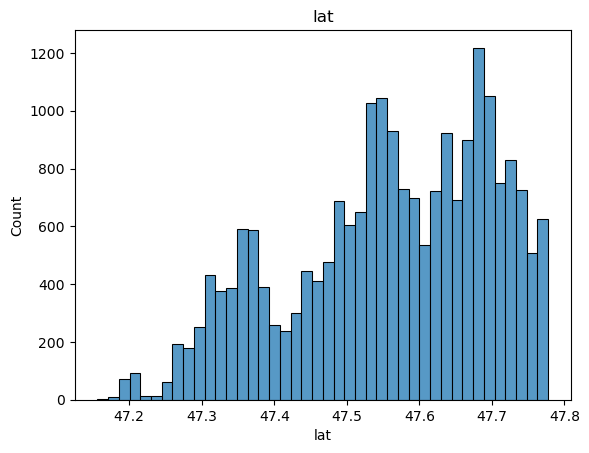

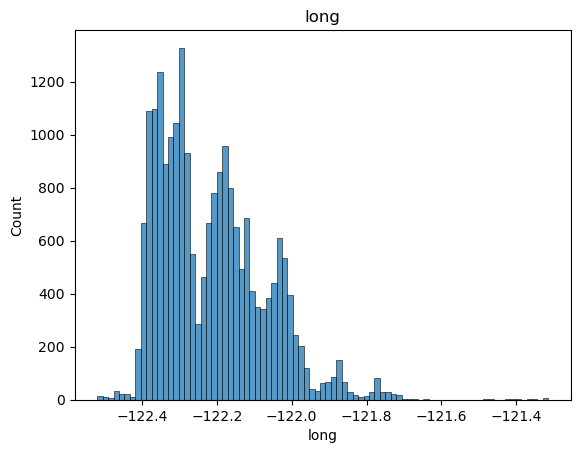

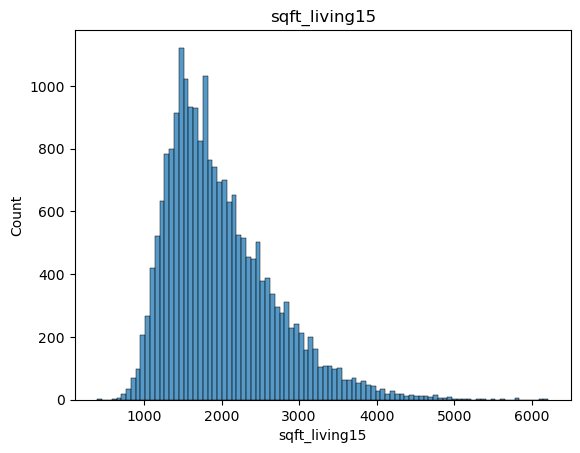

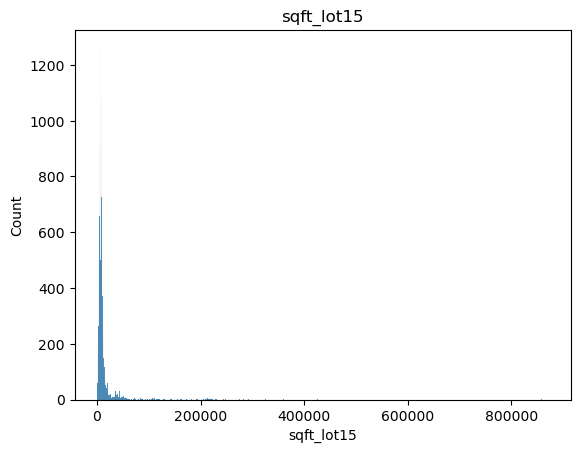

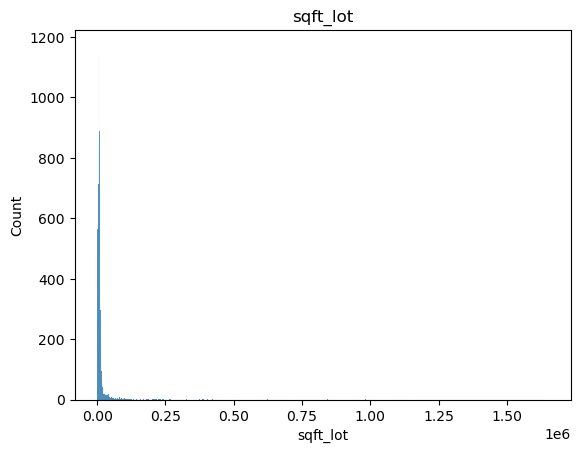

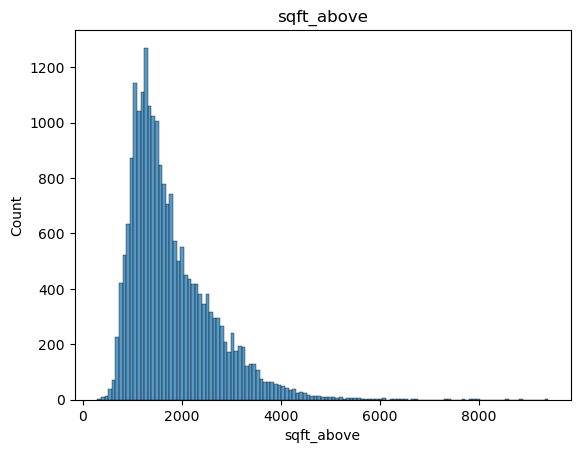

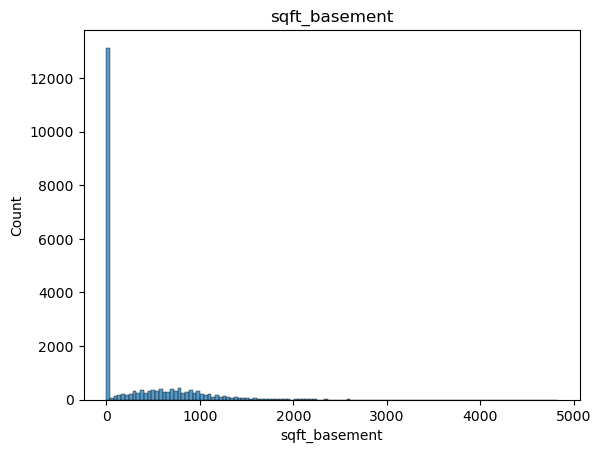

In [13]:
exclude = ['id', 'date']

for col in data.drop(columns=exclude):
    sns.histplot(data[col])
    plt.title(col)
    plt.show()


In [14]:
data['price'].value_counts()

price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3625, dtype: int64

In [15]:
data['log_price'] = np.log(data['price'] + 1)

In [16]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

data_filtered = data[(data['log_price'] >= Q1 - 1.5*IQR) & (data['log_price'] <= Q3 + 1.5*IQR)]
print("Original shape:", data.shape)
print("After outlier removal:", data_filtered.shape)

Original shape: (21613, 22)
After outlier removal: (21279, 22)


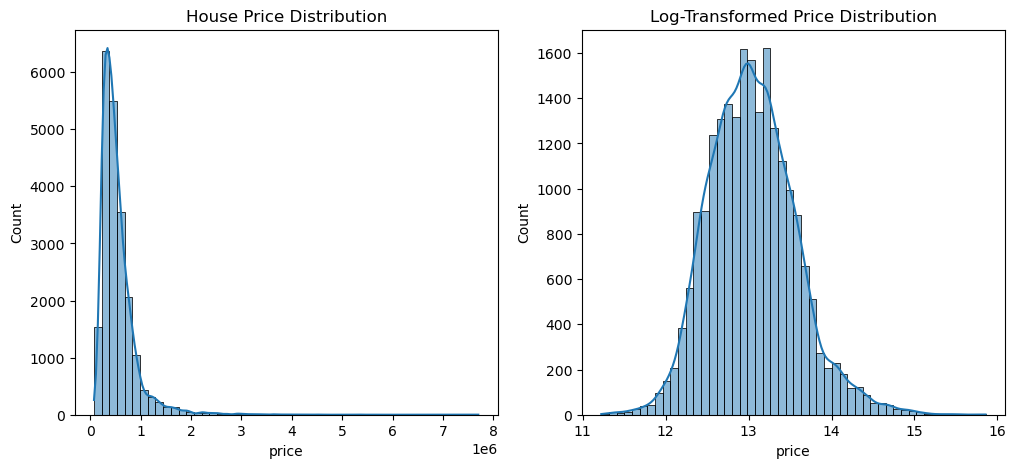

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, kde=True)
plt.title("House Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['price']), bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

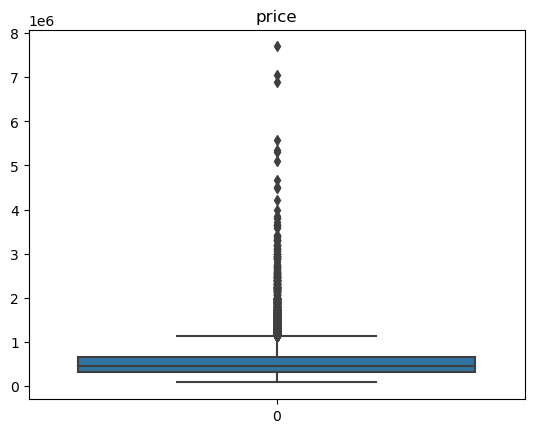

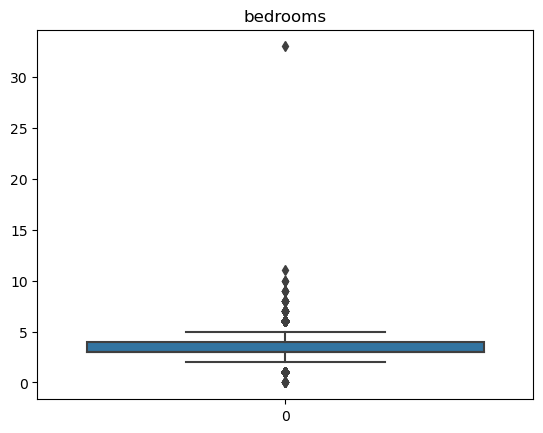

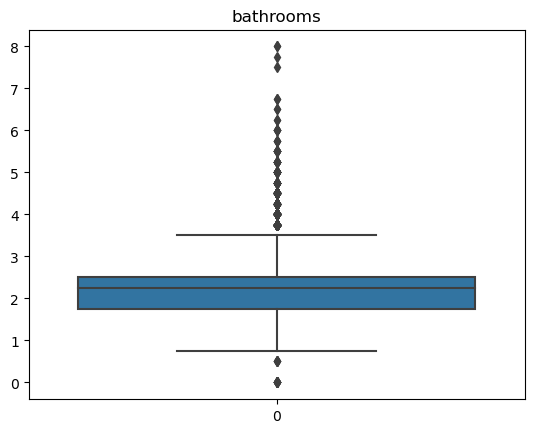

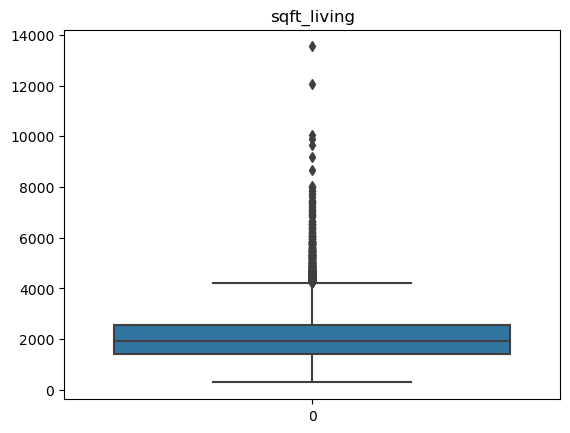

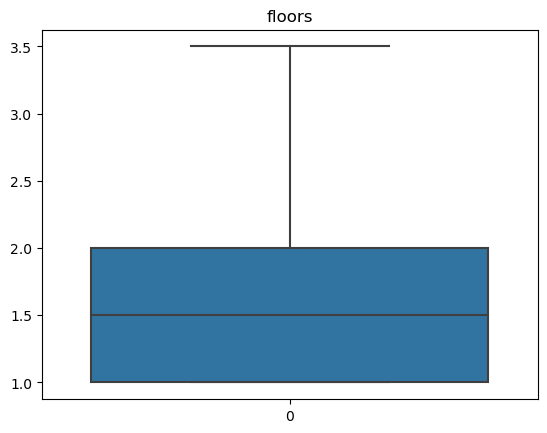

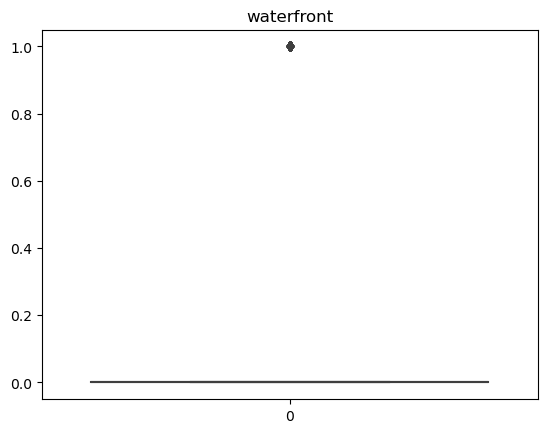

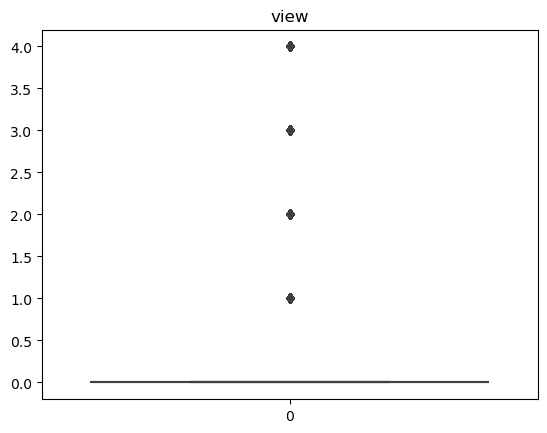

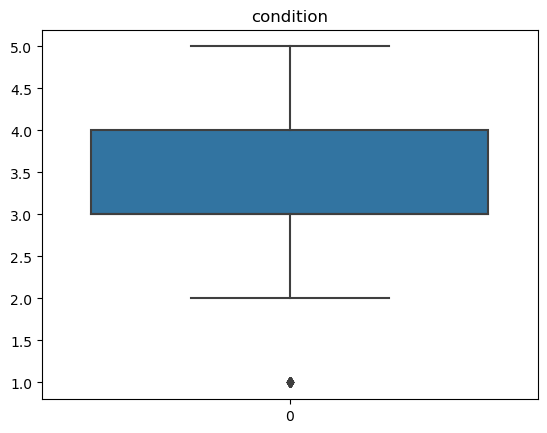

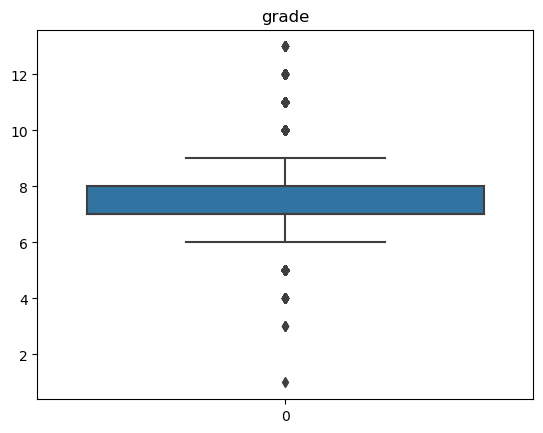

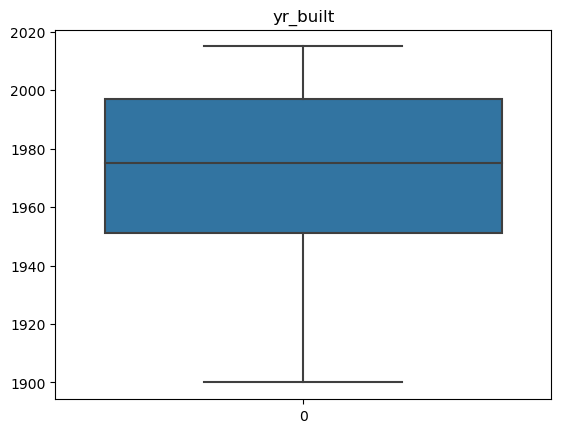

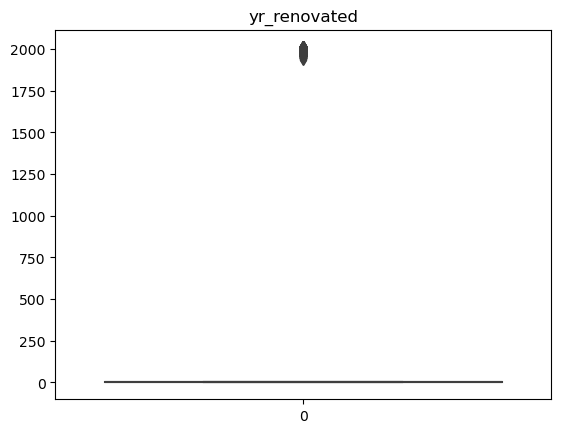

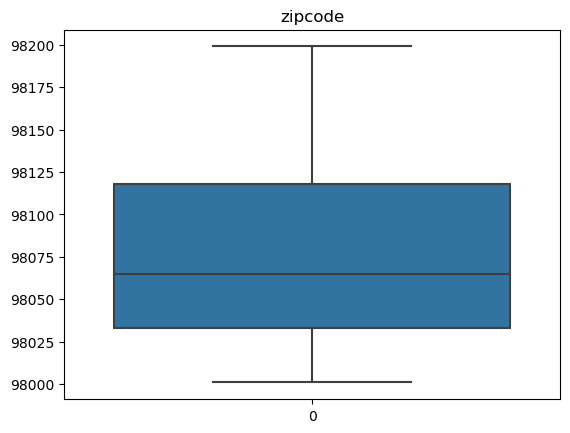

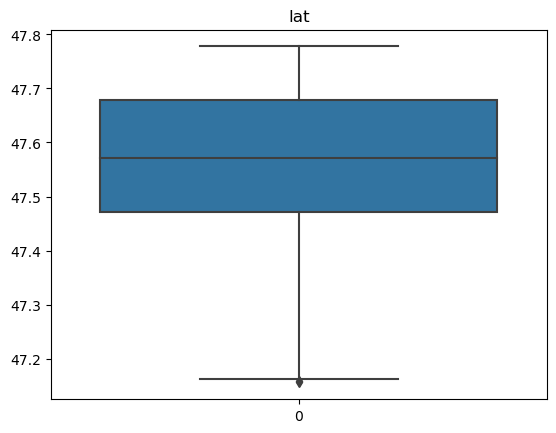

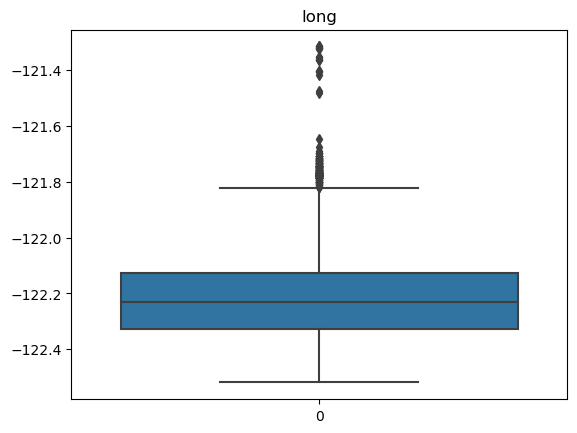

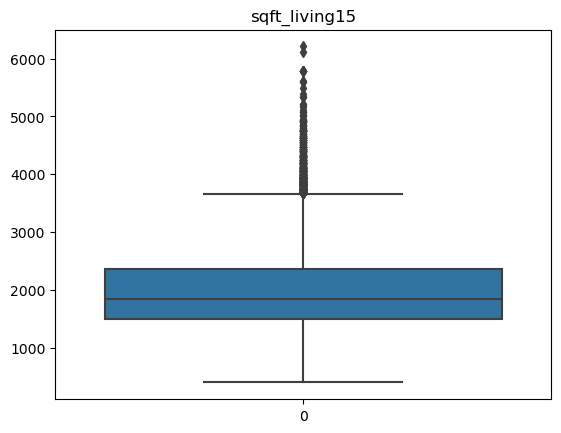

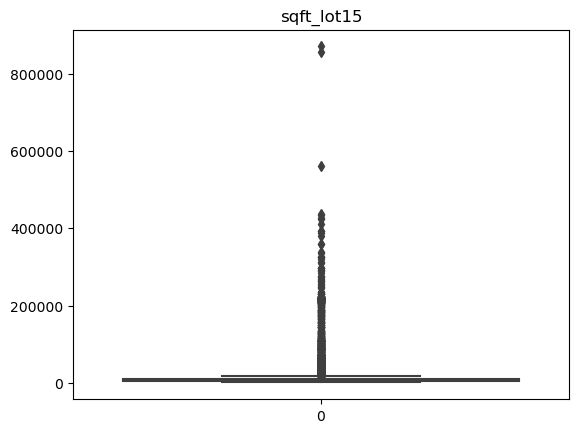

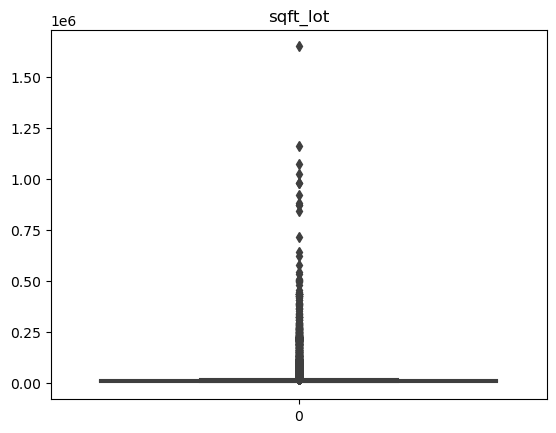

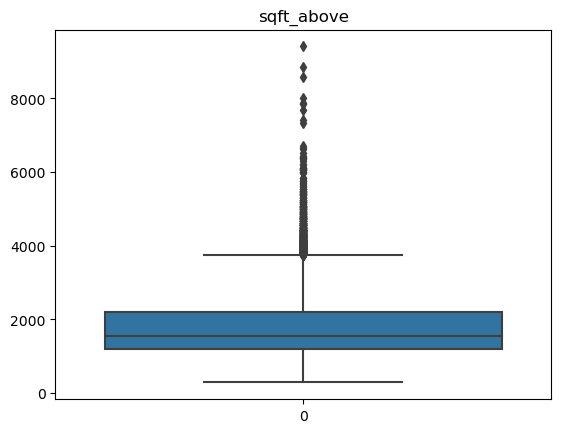

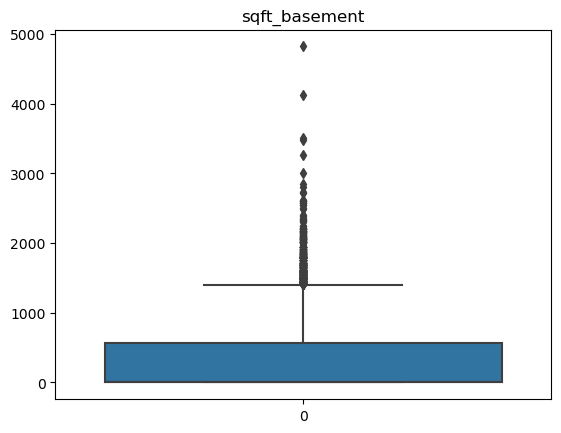

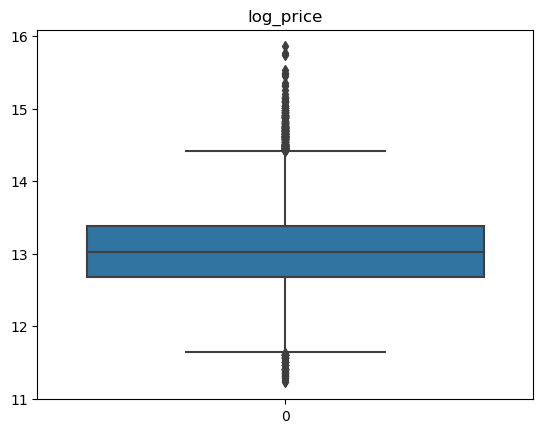

In [18]:
exclude = ['id', 'date']
for i in data.drop(columns=exclude):
     sns.boxplot(data[i])
     plt.title(i)
     plt.show()

In [19]:
data = data.drop(columns=['waterfront'])
data = data.drop(columns=['id'])

In [20]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement,log_price
0,13-10-2014,221900.0,3,1.00,1180,1.0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0,12.309987
1,09-12-2014,538000.0,3,2.25,2570,2.0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400,13.195616
2,25-02-2015,180000.0,2,1.00,770,1.0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0,12.100718
3,09-12-2014,604000.0,4,3.00,1960,1.0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910,13.311331
4,18-02-2015,510000.0,3,2.00,1680,1.0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0,13.142168


In [21]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
view               int64
condition          int64
grade              int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
sqft_lot           int64
sqft_above         int64
sqft_basement      int64
log_price        float64
dtype: object

In [22]:
exclude=['date']
for col in data.drop(columns=exclude):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data= data[(data[col] >= lower) & (data[col] <= upper)]

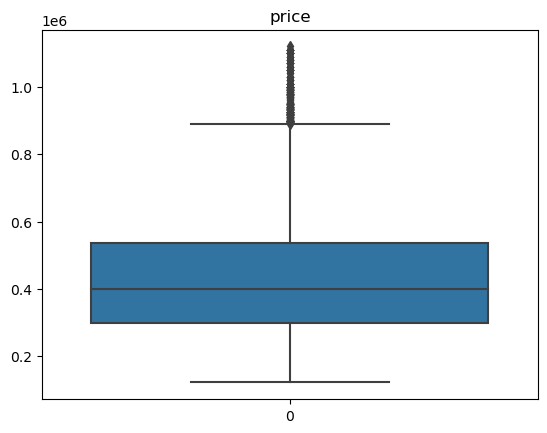

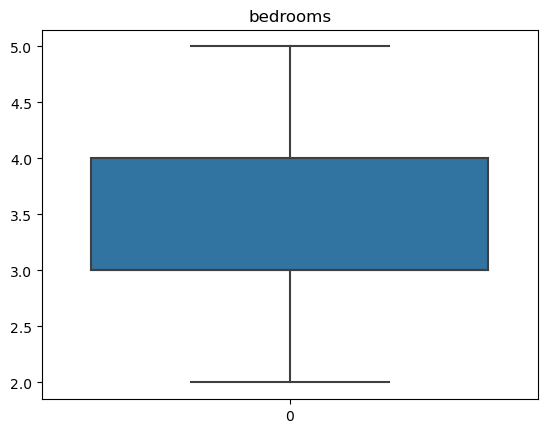

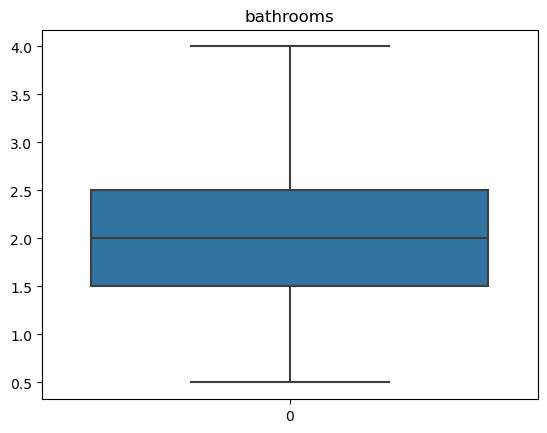

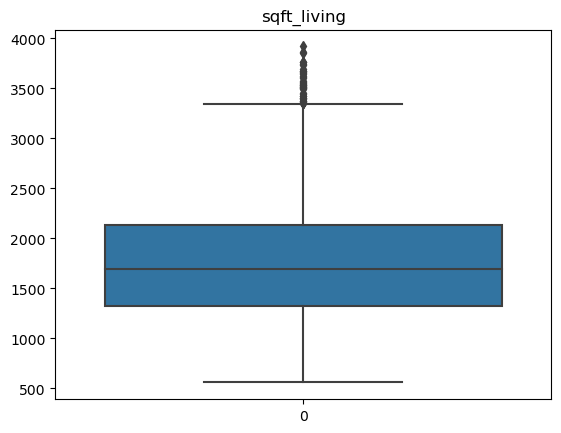

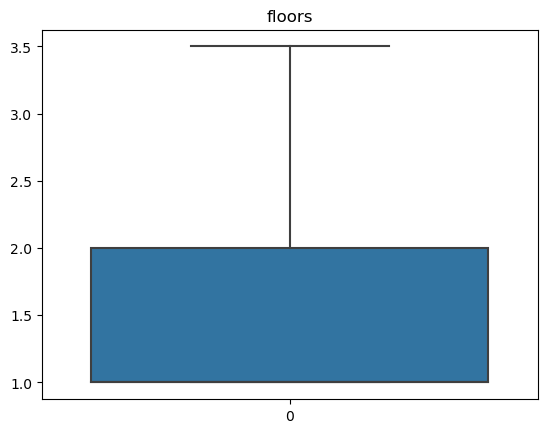

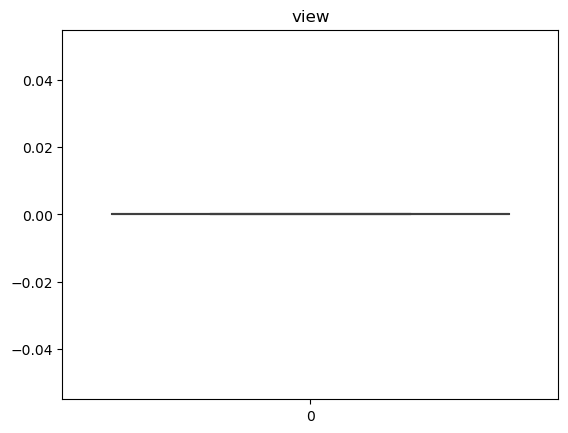

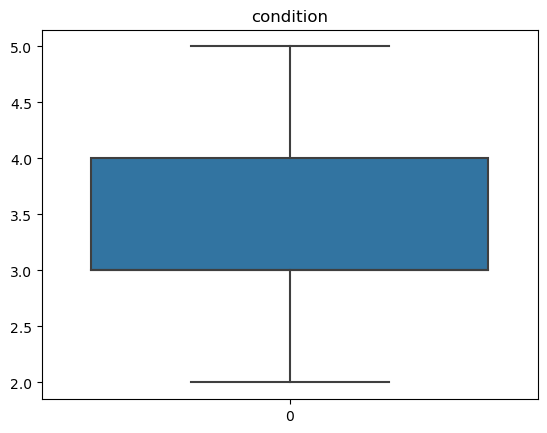

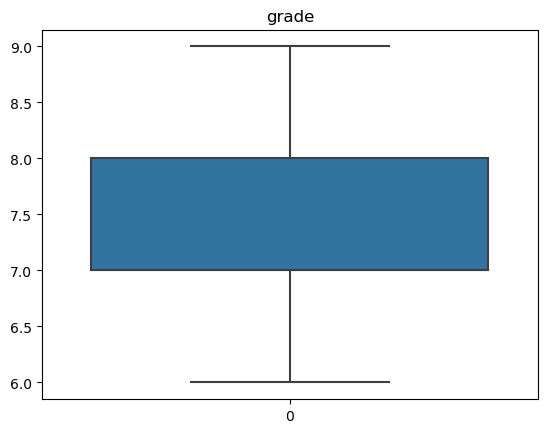

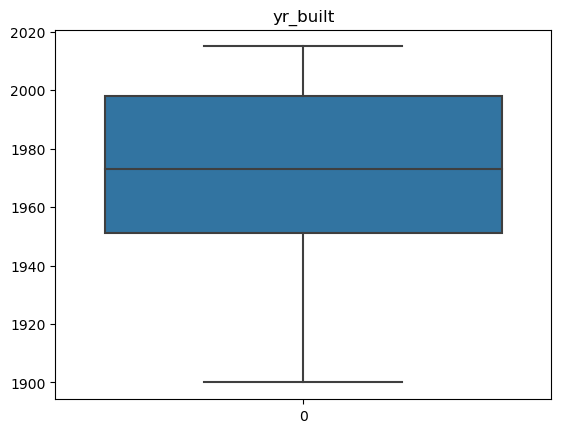

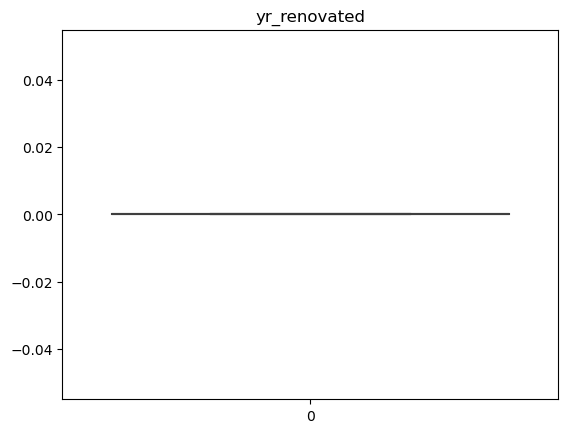

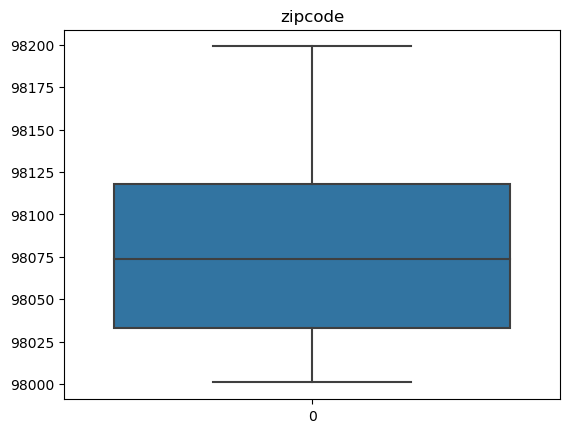

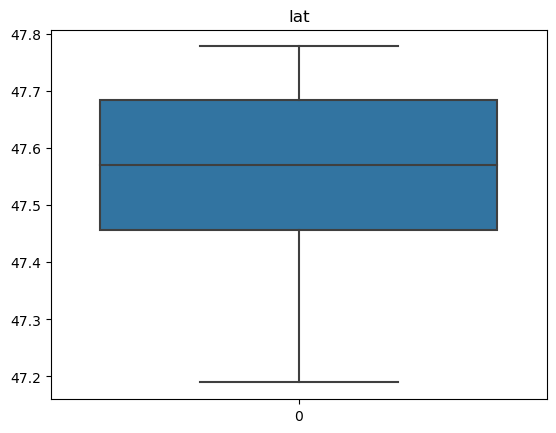

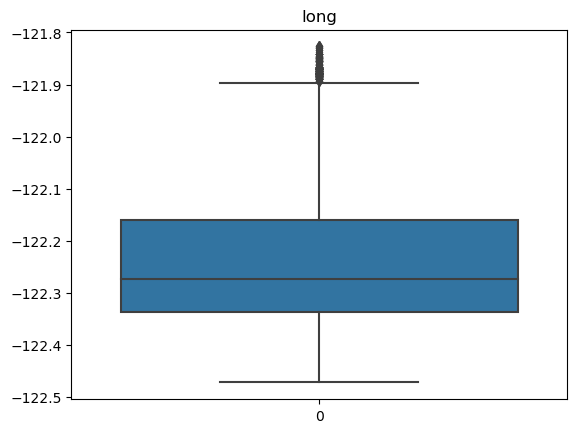

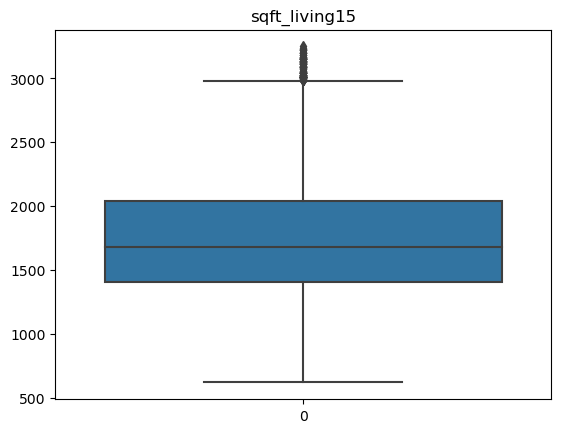

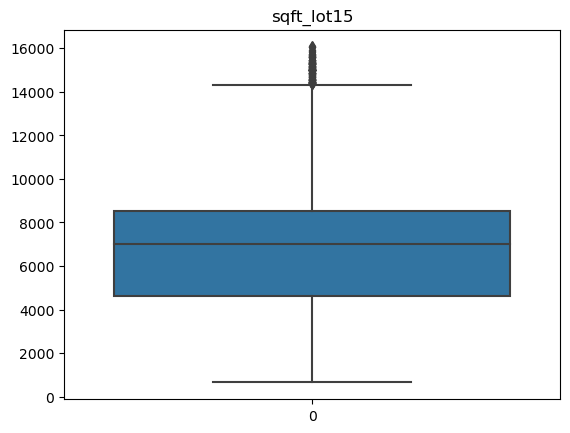

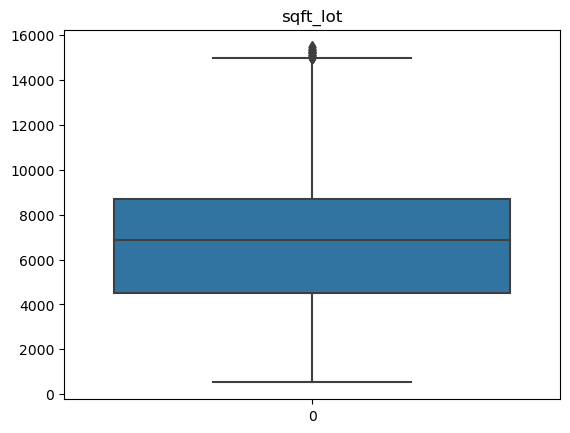

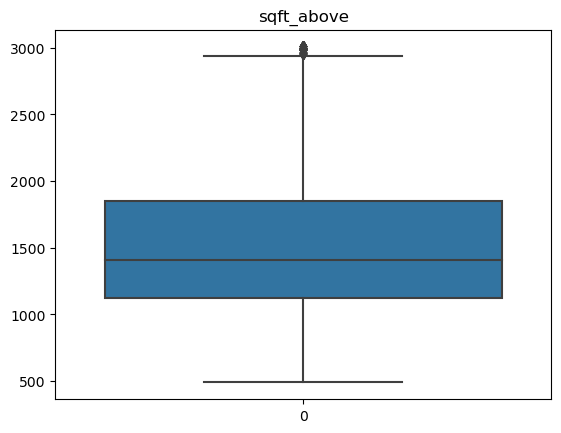

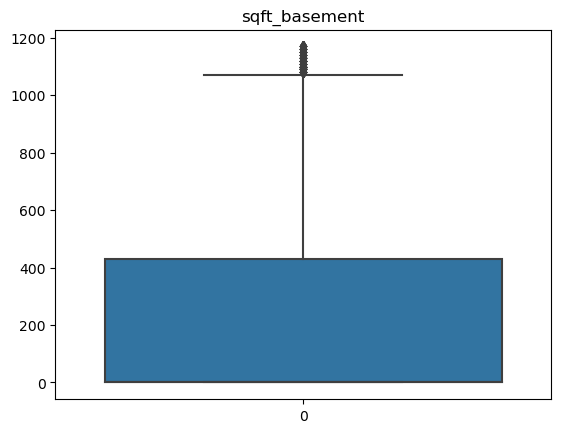

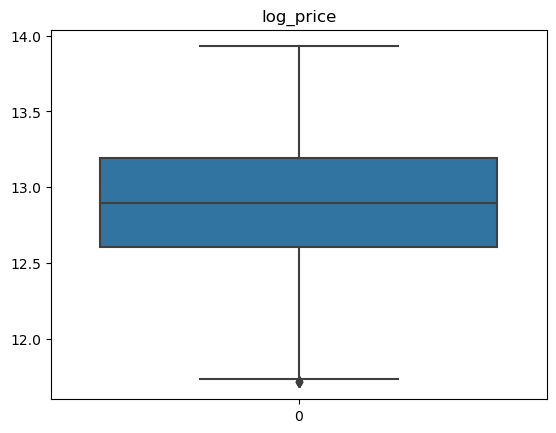

In [23]:
exclude = ['date']
for i in data.drop(columns=exclude):
     sns.boxplot(data[i])
     plt.title(i)
     plt.show()

In [24]:
exclude=['date']
for col in data.drop(columns=exclude):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data= data[(data[col] >= lower) & (data[col] <= upper)]

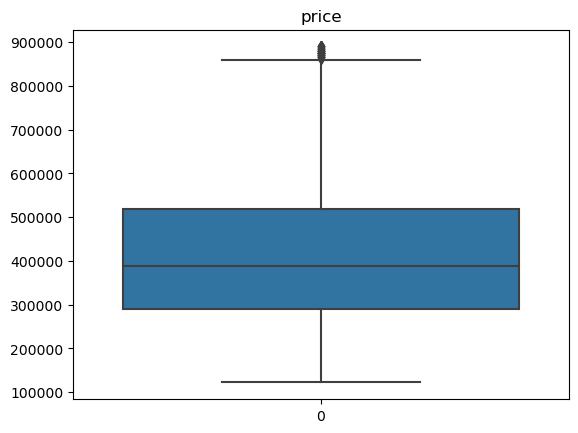

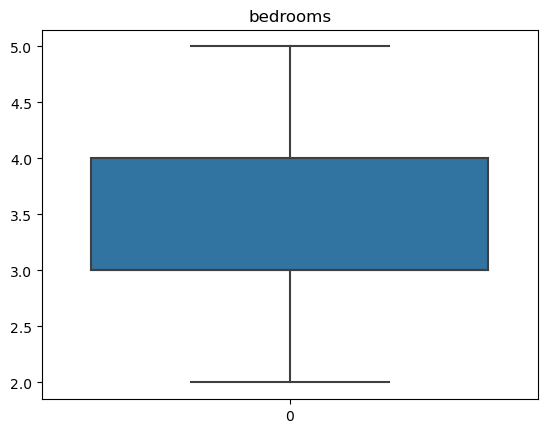

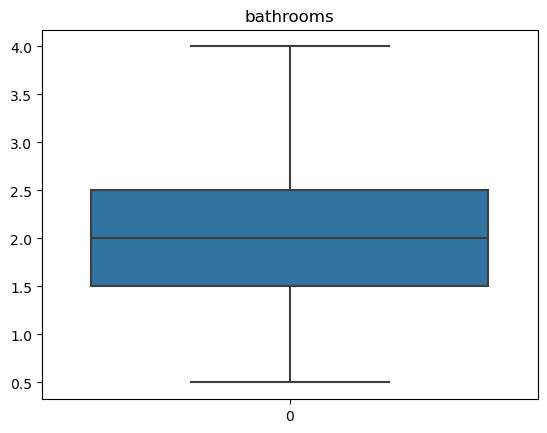

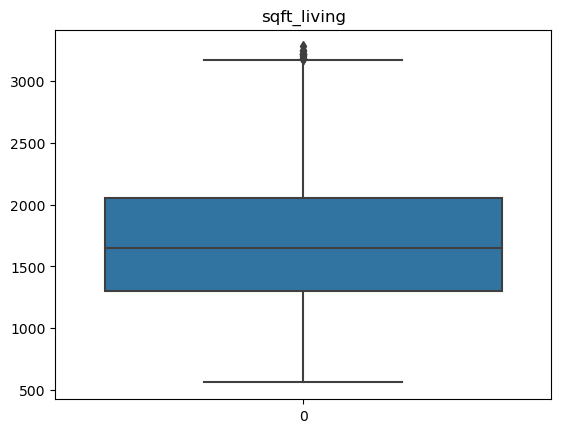

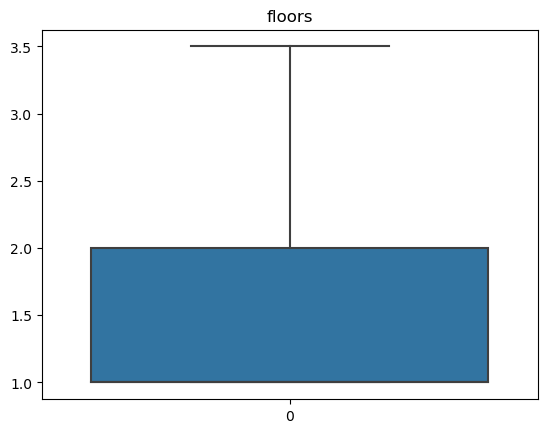

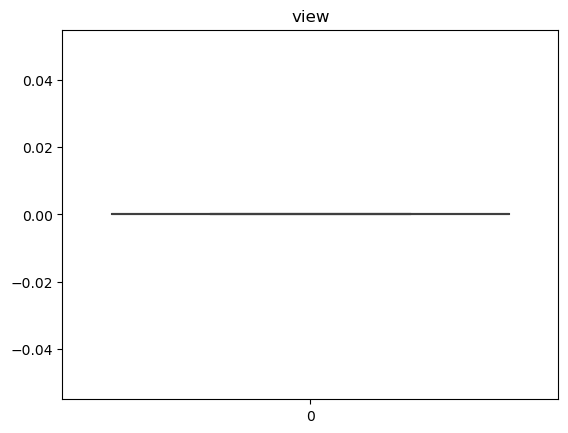

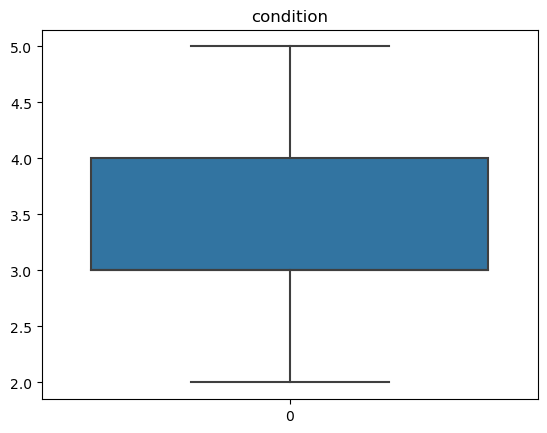

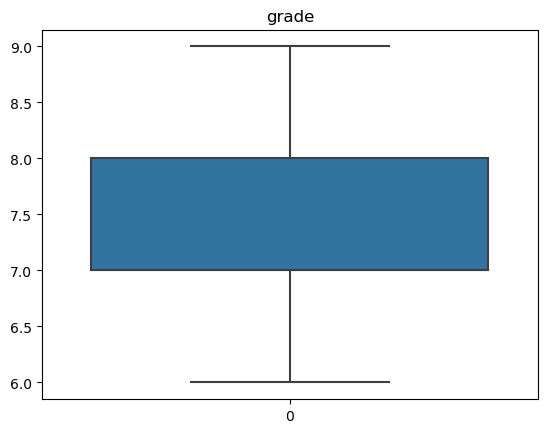

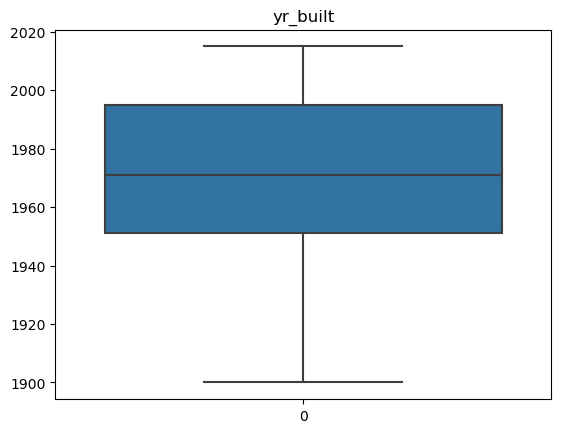

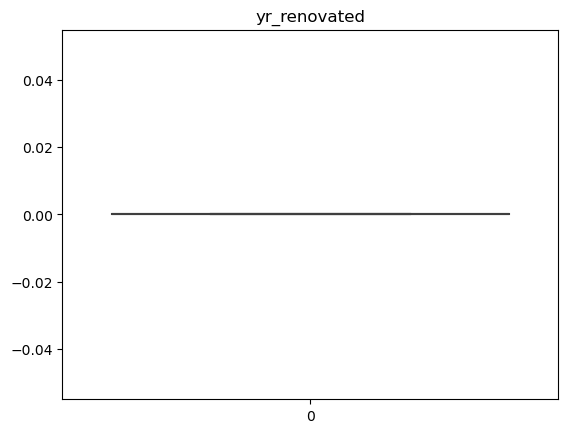

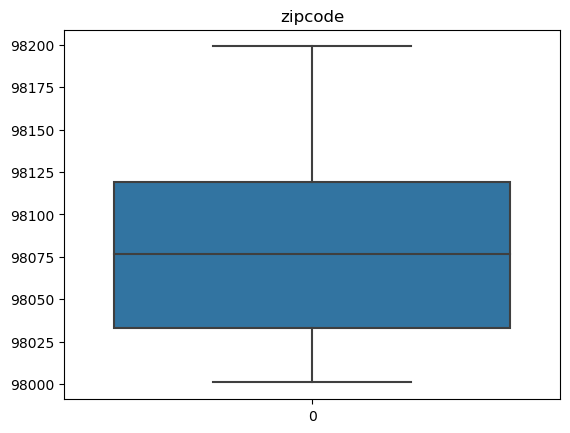

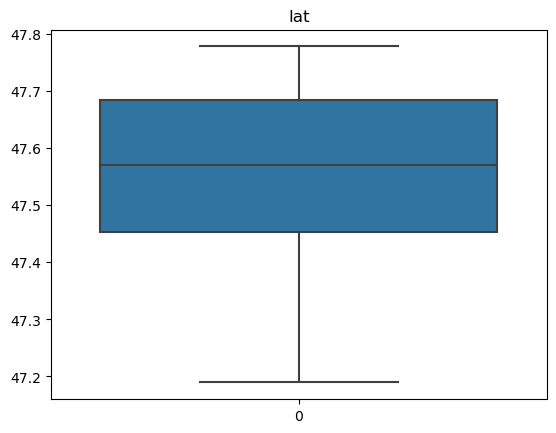

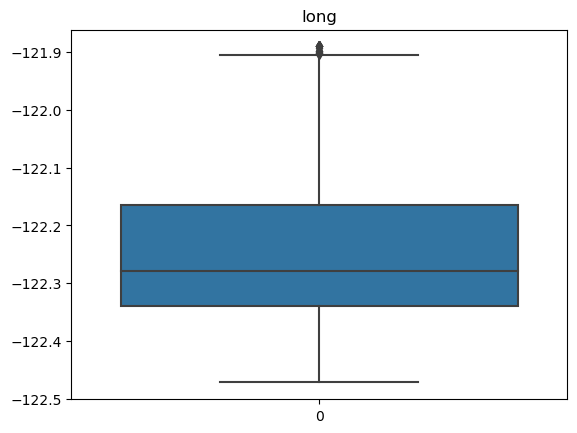

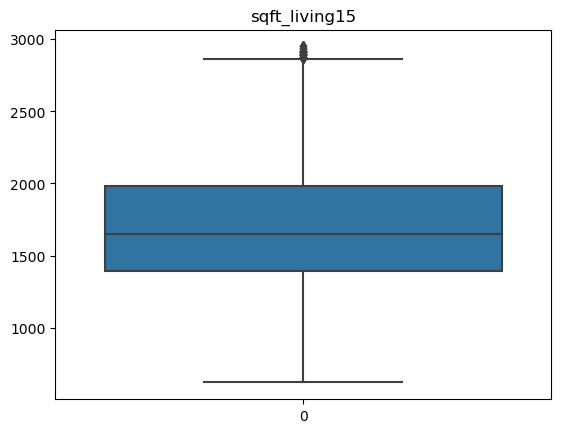

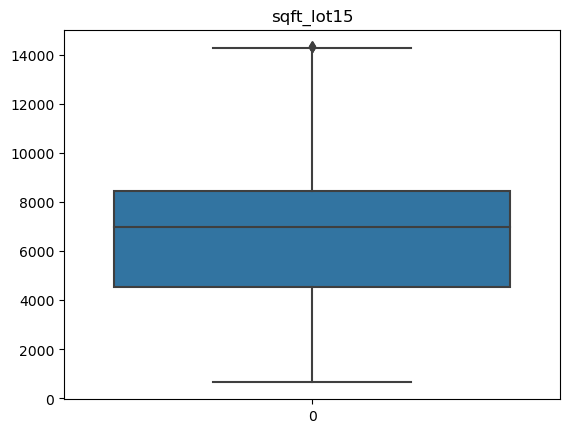

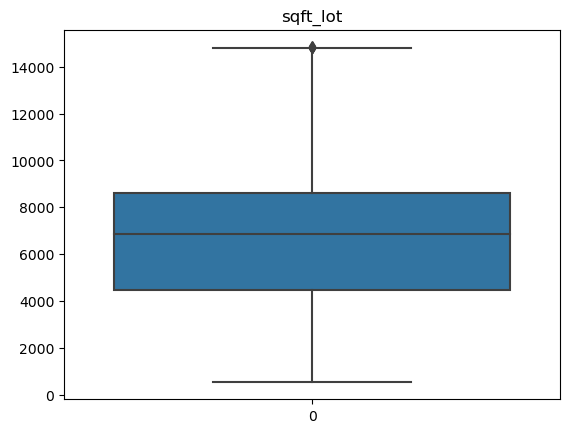

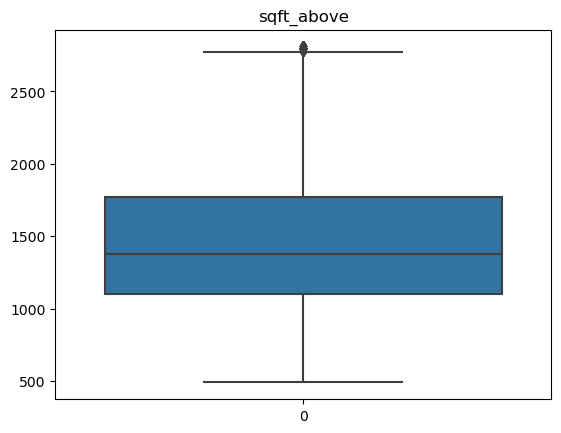

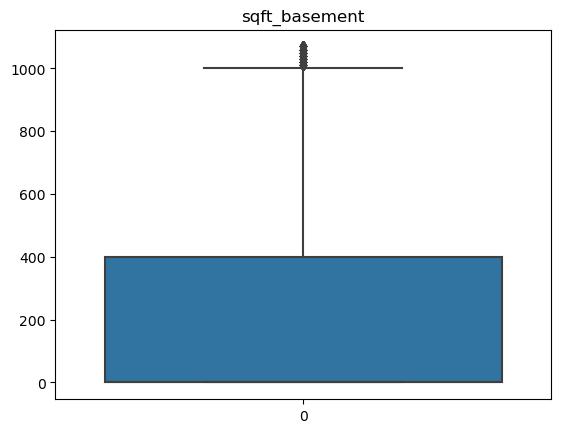

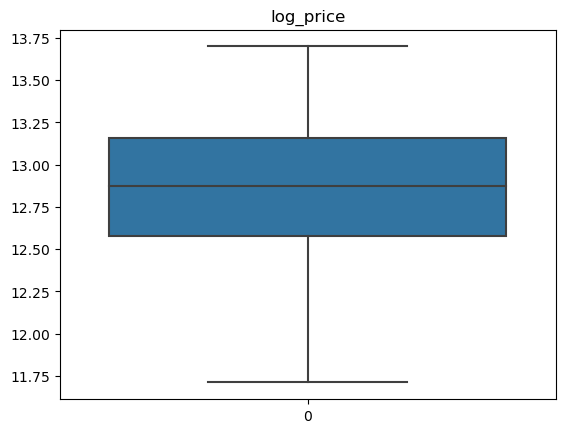

In [25]:
exclude = ['date']
for i in data.drop(columns=exclude):
     sns.boxplot(data[i])
     plt.title(i)
     plt.show()

In [ ]:
data = data.drop(columns=['view','log_price'])

In [27]:
data['yr_renovated'].value_counts()

yr_renovated
0    12822
Name: count, dtype: int64

In [28]:
data = data.drop(columns=['yr_renovated'])

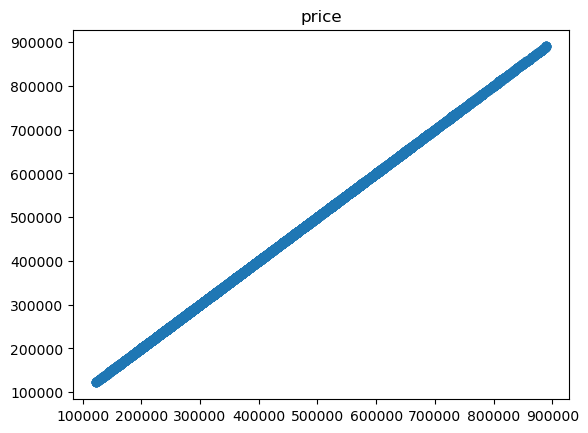

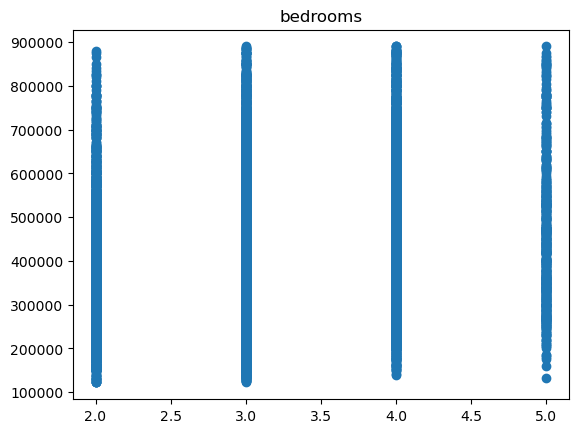

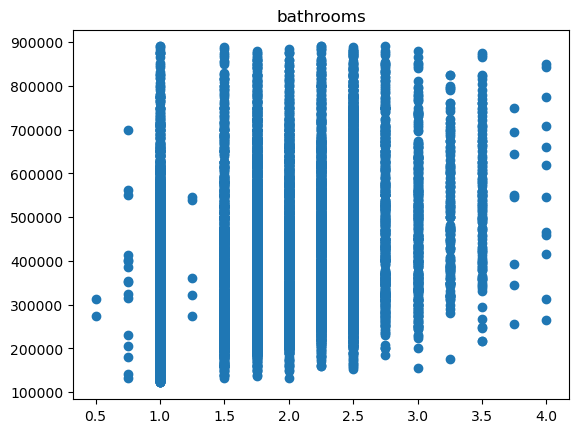

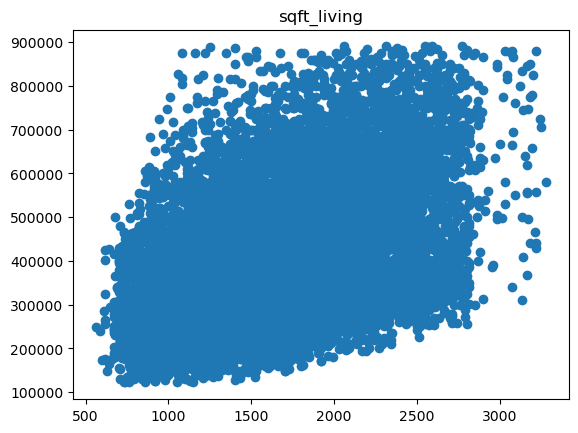

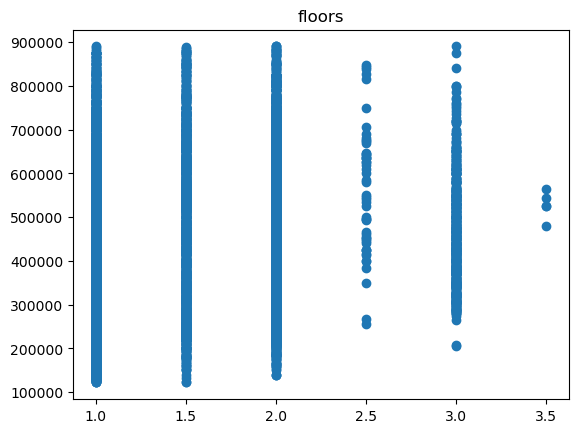

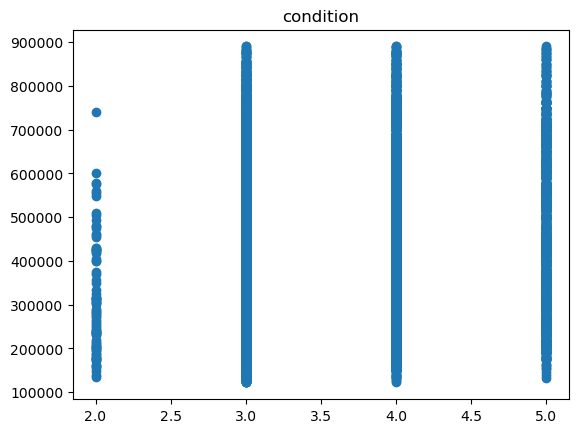

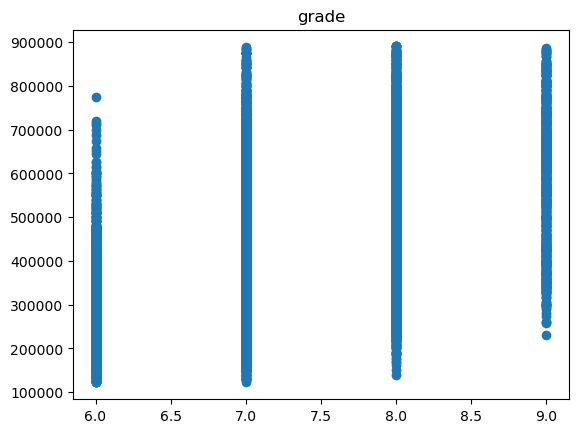

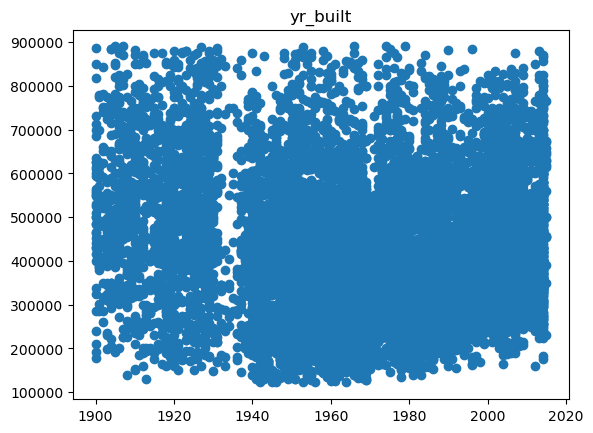

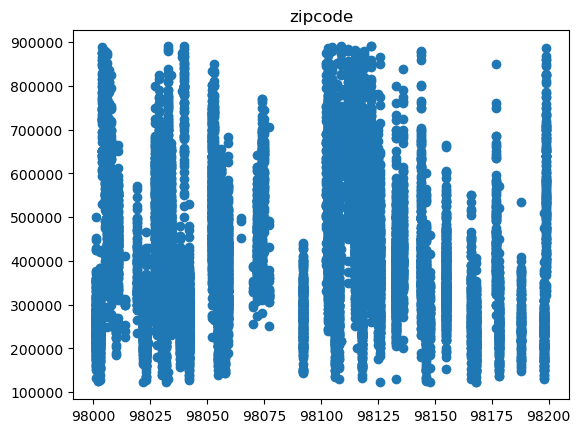

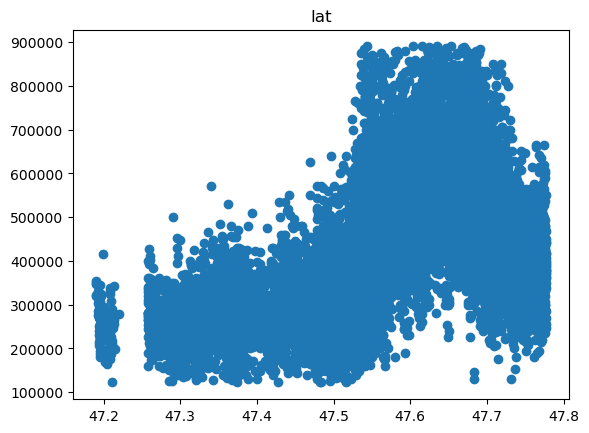

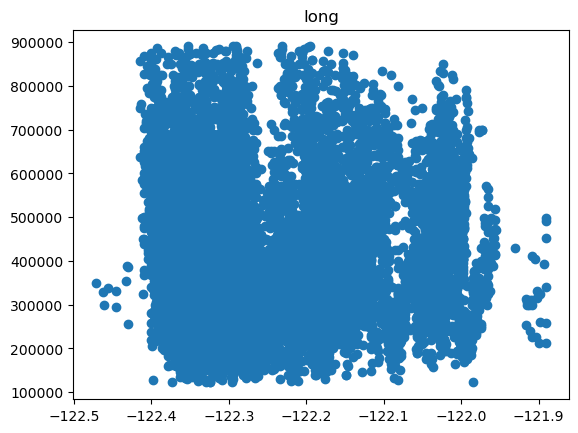

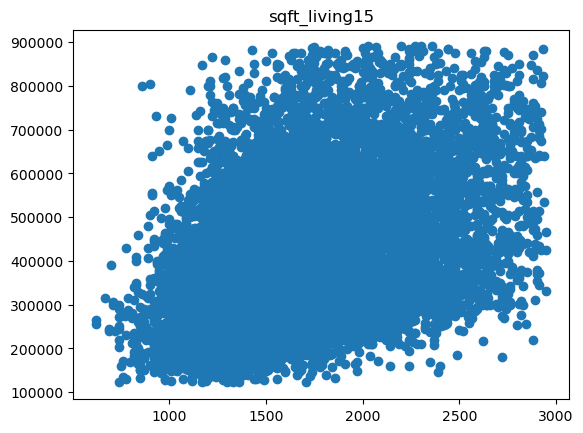

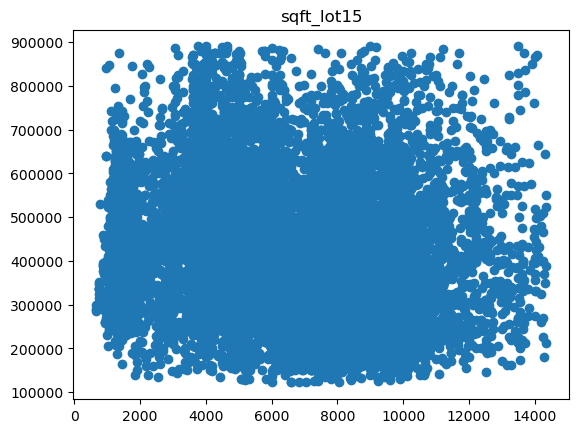

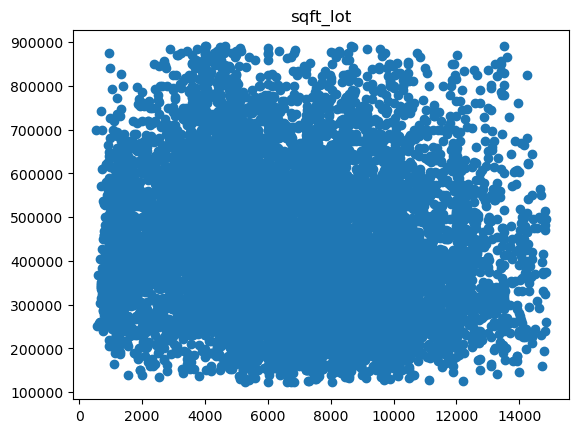

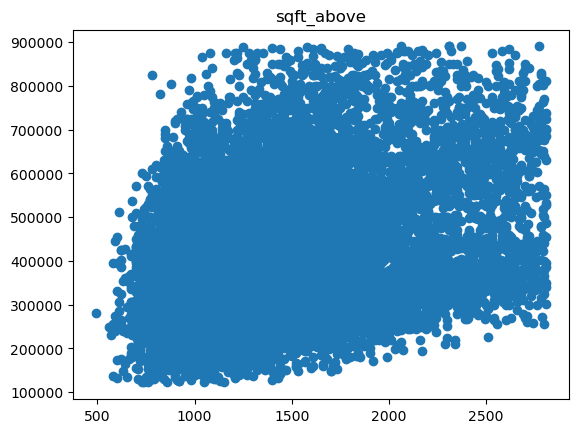

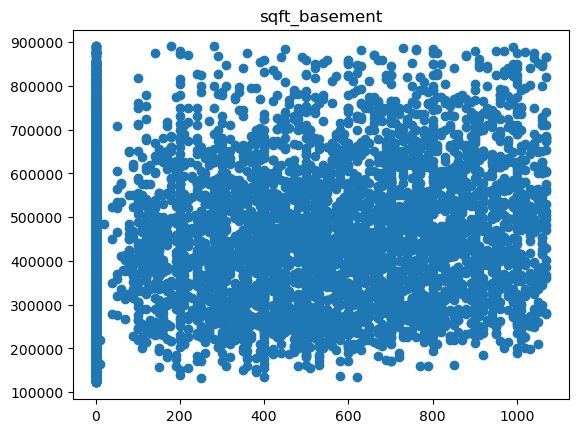

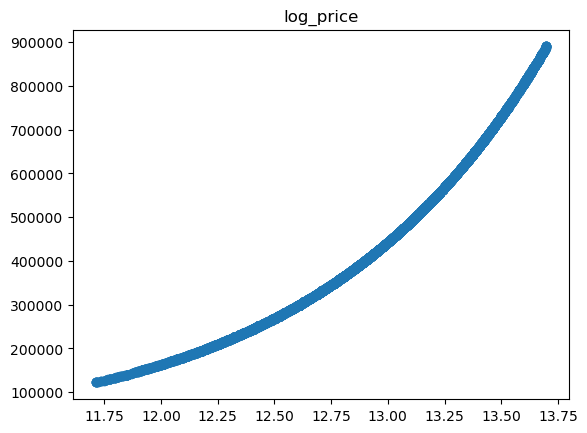

In [29]:
for i in data.drop(columns='date'):
    plt.scatter(data[i],data['price'])
    plt.title(i)
    plt.show()

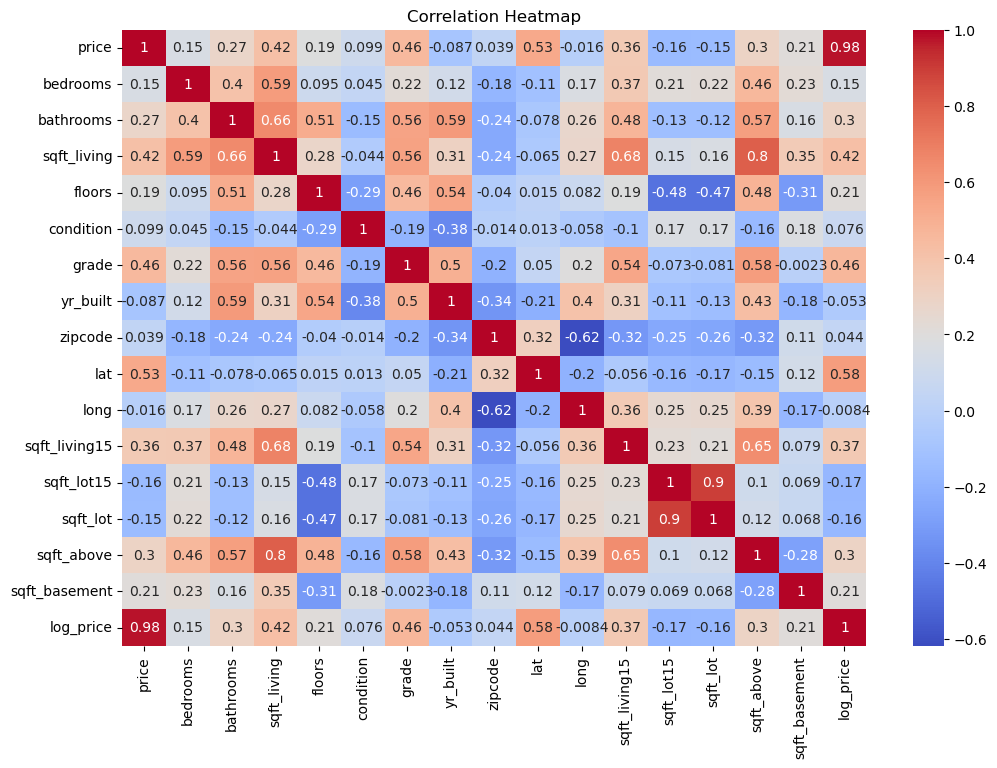

In [30]:
exclude=['date']
plt.figure(figsize=(12,8))
sns.heatmap(data.drop(columns=exclude).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [31]:
data = data.drop(columns=['date'])

In [32]:
data.shape

(12822, 17)

In [33]:
exclude=['price']
X=data.drop(columns=exclude)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X_train.col

In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

-490352.81795656955
[-1.12590980e+03 -3.86674013e+03  2.46456834e+00  7.12130978e+02
  1.67876660e+03  5.46274176e+03 -2.82383932e+02 -1.56424292e+01
 -6.17390981e+04 -5.40072906e+03 -2.87410765e+00  7.46699746e-01
 -4.85230053e-01  1.85497611e+00  6.09592218e-01  4.06771380e+05]


In [39]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
8706,434500.0,449421.846847
6589,230000.0,207440.329675
4215,291500.0,293522.661350
12656,676000.0,628424.601597
4980,860000.0,744790.920917
3387,350000.0,372942.323810
2062,462000.0,490046.951380
6514,775000.0,696471.425610
13950,834000.0,731722.132399
11153,515000.0,537270.581293


In [40]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 23984.55
Mean Squared Error:1054694031.85
Root Mean Squared Error:32476.05


In [42]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.96
Test Score 0.96
